***Vorlesung 'Syntax natürlicher Sprachen', WS 2020/21***

---
# Übung 9 (Lösung)

In [1]:
from exercises_9 import *
from questions import aufgabe
from nltk.tree import Tree
import nltk
import sys

---

## Aufgabe 1: Parsing-Algorithmen

#### Gegeben sei folgende kontextfreie Grammatik:

In [2]:
grammar = nltk.CFG.fromstring("""
S -> NP VP

NP  -> DET NOM
NOM -> ADJ NOM | N

ADJ -> "schöne" | "kluge" | "dicke"
DET -> "der" | "die" | "das"
N   -> "Mann" | "Frau" | "Buch"

VP -> V NP NP | V NP | V
V  -> "gibt" | "schenkt" | "schläft" | "gefällt" | "kennt"
""")

#### Parsen Sie jeweils alle unten angegebenen Sätze mit jedem der folgenden Parsing-Algorithmen. Bei der Auswahl von Regeln soll immer von oben nach unten und (bei Alternativen) von links nach rechts vorgegangen werden.

a) Recursive Descent <br>
b) Shift Reduce <br>
c) Earley Algorithmus <br>

    1. Der Mann gibt der Frau das Buch.
    2. Die kluge Frau kennt das dicke Buch.
    3. Der Mann schläft.

In [3]:
####Lösung für den kürzesten Satz (Rest: analog) mit nltk-Parsern und trace-output:


--- 
##### Lösung mit Recursive-Descent-Parser:

In [4]:
##Recursive Descent Parser:
from nltk.tree import Tree
parser = nltk.RecursiveDescentParser(grammar, trace=3)
sent = 'der Mann schläft'.split()
for tree in parser.parse(sent):
    tree.pretty_print(unicodelines=True)

Parsing 'der Mann schläft'
Start:
    [ * S ]
Expand: S -> NP VP
    [ * NP VP ]
Expand: NP -> DET NOM
    [ * DET NOM VP ]
Expand: DET -> 'der'
    [ * 'der' NOM VP ]
Match: 'der'
    [ 'der' * NOM VP ]
Expand: NOM -> ADJ NOM
    [ 'der' * ADJ NOM VP ]
Expand: ADJ -> 'schöne'
    [ 'der' * 'schöne' NOM VP ]
Backtrack: 'Mann' match failed
Expand: ADJ -> 'kluge'
    [ 'der' * 'kluge' NOM VP ]
Backtrack: 'Mann' match failed
Expand: ADJ -> 'dicke'
    [ 'der' * 'dicke' NOM VP ]
Backtrack: 'Mann' match failed
Expand: NOM -> N
    [ 'der' * N VP ]
Expand: N -> 'Mann'
    [ 'der' * 'Mann' VP ]
Match: 'Mann'
    [ 'der' 'Mann' * VP ]
Expand: VP -> V NP NP
    [ 'der' 'Mann' * V NP NP ]
Expand: V -> 'gibt'
    [ 'der' 'Mann' * 'gibt' NP NP ]
Backtrack: 'schläft' match failed
Expand: V -> 'schenkt'
    [ 'der' 'Mann' * 'schenkt' NP NP ]
Backtrack: 'schläft' match failed
Expand: V -> 'schläft'
    [ 'der' 'Mann' * 'schläft' NP NP ]
Match: 'schläft'
    [ 'der' 'Mann' 'schläft' * NP NP ]
Expand: 

--- 
##### Lösung mit Shift-Reduce-Parser:

In [5]:
##Shift Reduce Parser:
from nltk.tree import Tree
parser = nltk.ShiftReduceParser(grammar, trace=2)
sent = 'der Mann schläft'.split()
for tree in parser.parse(sent):
    tree.pretty_print(unicodelines=True)

Parsing 'der Mann schläft'
    [ * der Mann schläft]
  S [ 'der' * Mann schläft]
  R [ DET * Mann schläft]
  S [ DET 'Mann' * schläft]
  R [ DET N * schläft]
  R [ DET NOM * schläft]
  R [ NP * schläft]
  S [ NP 'schläft' * ]
  R [ NP V * ]
  R [ NP VP * ]
  R [ S * ]
         S          
     ┌───┴──────┐    
     NP         │   
 ┌───┴───┐      │    
 │      NOM     VP  
 │       │      │    
DET      N      V   
 │       │      │    
der     Mann schläft



--- 
##### Lösung mit Earley-Parser:

In [6]:
## Earley Parser:

from nltk.tree import Tree
parser = nltk.EarleyChartParser(grammar, trace=1)
sent = 'der Mann schläft'.split()
for tree in parser.parse(sent):
    tree.pretty_print(unicodelines=True)

|.    der    .    Mann   .  schläft  .|
|[-----------]           .           .| [0:1] 'der'
|.           [-----------]           .| [1:2] 'Mann'
|.           .           [-----------]| [2:3] 'schläft'
|>           .           .           .| [0:0] S  -> * NP VP
|>           .           .           .| [0:0] NP -> * DET NOM
|>           .           .           .| [0:0] DET -> * 'der'
|[-----------]           .           .| [0:1] DET -> 'der' *
|[----------->           .           .| [0:1] NP -> DET * NOM
|.           >           .           .| [1:1] NOM -> * ADJ NOM
|.           >           .           .| [1:1] NOM -> * N
|.           >           .           .| [1:1] N  -> * 'Mann'
|.           [-----------]           .| [1:2] N  -> 'Mann' *
|.           [-----------]           .| [1:2] NOM -> N *
|[-----------------------]           .| [0:2] NP -> DET NOM *
|[----------------------->           .| [0:2] S  -> NP * VP
|.           .           >           .| [2:2] VP -> * V NP NP
|.        

In [7]:
## Earley Parser (mit ausführlicherem trace = 2):

from nltk.tree import Tree
rd_parser = nltk.EarleyChartParser(grammar, trace=2)
sent = 'der Mann schläft'.split()
for tree in rd_parser.parse(sent):
    tree.pretty_print(unicodelines=True)

|.    der    .    Mann   .  schläft  .|
Leaf Init Rule:
|[-----------]           .           .| [0:1] 'der'
|.           [-----------]           .| [1:2] 'Mann'
|.           .           [-----------]| [2:3] 'schläft'
Top Down Init Rule:
|>           .           .           .| [0:0] S  -> * NP VP

* Processing queue: 0 

Predictor Rule:
|>           .           .           .| [0:0] NP -> * DET NOM
Predictor Rule:
|>           .           .           .| [0:0] DET -> * 'der'

* Processing queue: 1 

Scanner Rule:
|[-----------]           .           .| [0:1] DET -> 'der' *
Completer Rule:
|[----------->           .           .| [0:1] NP -> DET * NOM
Predictor Rule:
|.           >           .           .| [1:1] NOM -> * ADJ NOM
|.           >           .           .| [1:1] NOM -> * N
Predictor Rule:
|.           >           .           .| [1:1] N  -> * 'Mann'

* Processing queue: 2 

Scanner Rule:
|.           [-----------]           .| [1:2] N  -> 'Mann' *
Completer Rule:
|.           [--

--- 
# Hausaufgaben

---
## Aufgabe 2: Parsing-Algorithmen Reloaded

#### Kombinationen von Algorithmus und Satz in Aufgabe 1, die während der Präsenzaufgaben nicht behandelt wurden, stellen zusätzliches Übungsmaterial dar.

#### Bearbeiten Sie zusätzlich auch die folgenden interaktiven Aufgaben in a) und b)!

---
## Aufgabe 2 a)

#### Welche Operationen stehen den verschiedenen Parsern zur Verfügung?

In [8]:
aufgabe(blatt9_2a)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operationen hat der Recursive Descent …

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operationen hat der Shift Reduce Parse…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operationen hat der Earley Parser?</h4…

---
### Aufgabe 2 b)

#### Überlegen Sie für die folgenen Beispiele zu welchem Algorithmus diese gehören und was die nächste von diesem auszuführende Operation ist.

### Beispiel 1:

$ Q_{0}$ : (S' -> * S, 0)

In [9]:
aufgabe(blatt9_2b_1)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Parser handelt es sich?</h4>', layou…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 2:

#### Betrachen Sie den folgenden Baum zu dem Satz "der Mann schläft" und die entsprechenden Grammatikregeln von oben.

In [10]:
dep_tree = Tree(
    "S",
    [
        Tree("NP", [Tree("DET",[""]),Tree("Nom", [""])]),
        Tree("VP", [""])    
    ]
)

dep_tree.pretty_print()

         S     
      ___|___   
     NP      | 
  ___|___    |  
DET     Nom  VP
 |       |   |  
               



In [11]:
aufgabe(blatt9_2b_2)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Parser handelt es sich?</h4>', layou…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 3:


#### Betrachen Sie den folgenden Ausschnitt der Zustandsmenge zu dem Satz "der Mann schläft" und die entsprechenden Grammatikregeln von oben.

$ Q_{0}$ : (DET -> * der, 0)

In [12]:
aufgabe(blatt9_2b_3)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Parser handelt es sich?</h4>', layou…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 4:


#### Betrachen Sie den folgenden Ausschnitt der Zustandsmenge zu dem Satz "der Mann schläft" und die entsprechenden Grammatikregeln von oben.

$ Q_{1}$ : (DET -> der * , 0)

In [13]:
aufgabe(blatt9_2b_4)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welchen Parser handelt es sich?</h4>', layou…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 5:

![earley_1](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/earley_1.png)

In [14]:
aufgabe(blatt9_2b_5)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 6:

![earley_2](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/earley_2.png)

In [15]:
aufgabe(blatt9_2b_6)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 7:

![earley_3](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/earley_3.png)

In [16]:
aufgabe(blatt9_2b_7)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 8:

![recdes_1](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/recdes_1.png)

In [17]:
aufgabe(blatt9_2b_8)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 9:

![recdes_2](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/recdes_2.png)

In [18]:
aufgabe(blatt9_2b_9)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 10:

![recdes_3](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/recdes_3.png)

In [19]:
aufgabe(blatt9_2b_10)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 11:

![shiftred_1](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/shiftred_1.png)

In [20]:
aufgabe(blatt9_2b_11)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 12:

![shiftred_2](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/shiftred_2.png)

In [21]:
aufgabe(blatt9_2b_12)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

### Beispiel 13:

![shiftred_3](https://github.com/awisiorek/syntax-1819/raw/master/uebung/img/shiftred_3.png)

In [22]:
aufgabe(blatt9_2b_13)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Operation folgt als nächstes?</h4>', lay…

---
## Aufgabe 3: Imperativ ohne Subjekt

#### Betrachten Sie die folgende kontextfreie Merkmalsgrammatik:

In [23]:
##Angabe:
grammar = """
S -> NP VP
S -> VP

NP -> DET N
VP -> V[SUBCAT=tr] NP
VP -> V[SUBCAT=intr]

DET -> "das"
N -> "Kind" | "Buch"

V[SUBCAT=tr] -> "lies"
V[SUBCAT=tr] -> "liest"
V[SUBCAT=intr] -> "schlaf"
V[SUBCAT=intr] -> "schläft"
"""

In [24]:
##Lösung:
grammar = """
# b)
S -> NP VP[MOOD="ind"]
S -> VP[MOOD="imp"]

VP[MOOD=?x] -> V[SUBCAT=tr,MOOD=?x] NP 
VP[MOOD=?x] -> V[SUBCAT=intr,MOOD=?x]

NP -> DET N

DET -> "das"
N -> "Kind" | "Buch"

# a)
V[SUBCAT=intr,MOOD="imp"] -> "schlaf"
V[SUBCAT=intr,MOOD="ind"] -> "schläft"

V[SUBCAT=tr,MOOD="imp"] -> "lies"
V[SUBCAT=tr,MOOD="ind"] -> "liest"
"""

#### Hier wurde versucht, Aufforderungssätze zu modellieren. Allerdings akzeptiert diese Grammatik immer noch viele ungrammatische Sätze.

a) Fügen Sie ein Merkmal `MOOD` mit den möglichen Werten *imp* und *ind* für Imperativ und Indikativ hinzu und deklarieren Sie die entsprechenden Werte im Lexikon (den lexikalischen Regeln). <br>
b) Formulieren Sie dann Bedingungen in den syntaktischen Regeln, sodass folgende grammatische Sätze (`pos_sentences`) weiterhin akzeptiert und folgende ungrammatische Sätze (`neg_sentences`) abgelehnt werden.

In [25]:
pos_sentences = [
    "das Kind schläft",
    "das Kind liest das Buch",
    "lies das Buch",
    "schlaf"
]

neg_sentences = [
    "das Kind schlaf",
    "das Kind lies das Buch",
    "liest das Buch",
    "schläft"
]

In [26]:
from IPython.display import display

def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        sys.stdout.flush()
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            display(tree)  # tree.draw() oder print(tree)
            analyzed = True
        if not analyzed:
            print("Keine Analyse möglich", file=sys.stderr)
            sys.stderr.flush()

Hier sollten nur korrekte Syntaxbäume herauskommen:

Satz 1: das Kind schläft


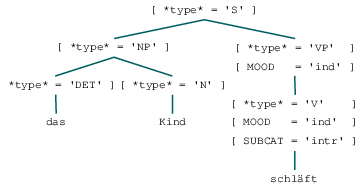

Satz 2: das Kind liest das Buch


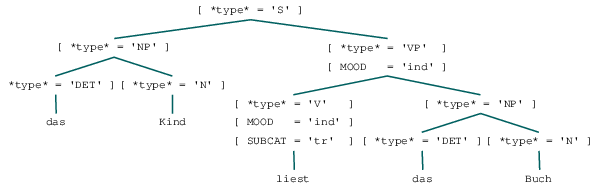

Satz 3: lies das Buch


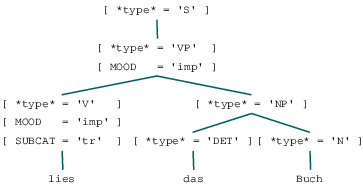

Satz 4: schlaf


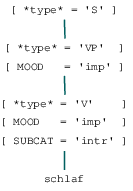

In [27]:
test_grammar(grammar, pos_sentences)

Hier sollte ausschließlich `Keine Analyse möglich` stehen:

In [28]:
test_grammar(grammar, neg_sentences)

Satz 1: das Kind schlaf


Keine Analyse möglich


Satz 2: das Kind lies das Buch


Keine Analyse möglich


Satz 3: liest das Buch


Keine Analyse möglich


Satz 4: schläft


Keine Analyse möglich


---
## &ast;Aufgabe 4: Recursive Descent Parser Demo

#### Die Demo-Applikation `nltk.app.rdparser()` veranschaulicht die Funktionsweise eines Recursive Descent Parsers. Spielen Sie ein wenig mit der Demo, nehmen Sie Änderungen an der Grammatik vor und stellen Sie sicher, dass Sie verstehen wie jeder einzelne Schritt zustandekommt.

---
## &ast;Aufgabe 5: NLTK-Kapitel zum Parsing 

#### In folgenden NLTK-Kapiteln (8.4 und 8.2-extras) zum Parsing mit kontextfreien Grammatiken können Sie sich weiterführend über top-down-, bottom-up- sowie Chart-Parsing informieren:

- Teilkapitel 8.4 (’Parsing With Context Free Grammar’):
http://www.nltk.org/book/ch08.html
- Teilkapitel 2.1-2.8 (’Chart Parsing’) des Zusatzkapitels zu Kapitel 8:
http://www.nltk.org/book/ch08-extras.html